In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [81]:
nis=pd.read_csv("TaxiFare.csv")

In [82]:
nis.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [83]:
nis.shape

(50000, 8)

In [84]:
nis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


<Axes: xlabel='no_of_passenger', ylabel='count'>

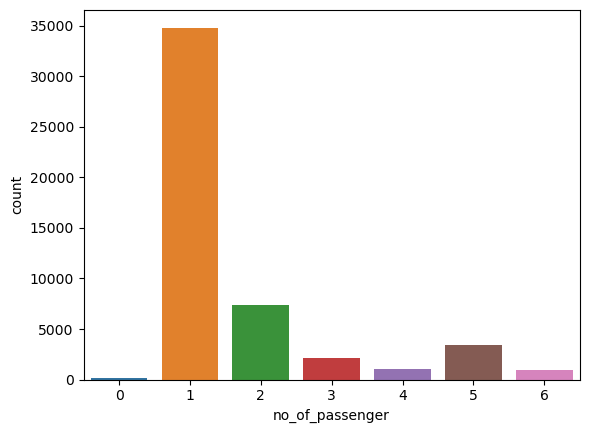

In [85]:
sns.countplot(x="no_of_passenger",data=nis)

In [86]:
nis = nis[nis['no_of_passenger'] == 1]
nis = nis.drop(["unique_id","no_of_passenger"],axis=1)
nis.head()

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762
5,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.731630,-73.972892,40.758233


In [87]:
nis.shape

(34808, 6)

In [88]:
corr_matrix=nis.corr()
corr_matrix["amount"].sort_values(ascending=False)

amount                  1.000000
longitude_of_dropoff    0.005171
longitude_of_pickup     0.004961
latitude_of_dropoff    -0.005030
latitude_of_pickup     -0.005709
Name: amount, dtype: float64

In [89]:
import datetime
from math import sqrt

In [90]:
for i, row in nis.iterrows():
    dt=datetime.datetime.strptime(row["date_time_of_pickup"],"%Y-%m-%d %H:%M:%S UTC")
    nis.at[i, "day_of_week"] = dt.weekday()
    nis.at[i, "pickup_time"]=dt.hour
    x=(row["longitude_of_dropoff"]-row["longitude_of_pickup"])*54.6 # 1 degree == 54.6 miles
    y=(row['latitude_of_dropoff']-row['latitude_of_pickup'])*69.0 # 1 degree == 69 miles
    distance=sqrt(x**2 + y**2)
    nis.at[i,'distance'] = distance
nis.head()    

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,day_of_week,pickup_time,distance
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,0.0,17.0,0.641024
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0,16.0,5.275538
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,5.0,4.0,1.738444
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0,7.0,1.253707
5,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.731630,-73.972892,40.758233,3.0,9.0,2.391384


In [91]:
# remove the columns are no longer needed
nis.drop(columns=['date_time_of_pickup','longitude_of_pickup','latitude_of_pickup','longitude_of_dropoff','latitude_of_dropoff'], inplace=True)
nis.head()

,amount,day_of_week,pickup_time,distance
0,4.5,0.0,17.0,0.641024
1,16.9,1.0,16.0,5.275538
3,7.7,5.0,4.0,1.738444
4,5.3,1.0,7.0,1.253707
5,12.1,3.0,9.0,2.391384


In [92]:
corr_matrix = nis.corr()
corr_matrix["amount"].sort_values(ascending=False)

amount         1.000000
distance       0.014725
day_of_week    0.010151
pickup_time   -0.015876
Name: amount, dtype: float64

In [93]:
nis.describe()

,amount,day_of_week,pickup_time,distance
count,34808.000000,34808.000000,34808.000000,34808.000000
mean,11.210226,2.947713,13.382757,11.850895
std,9.527580,1.942392,6.401627,246.753948
min,-5.000000,0.000000,0.000000,0.000000
25%,6.000000,1.000000,9.000000,0.771727
50%,8.500000,3.000000,14.000000,1.322725
75%,12.500000,5.000000,19.000000,2.414889
max,200.000000,6.000000,23.000000,24861.003946


In [94]:
nis= nis[(nis["distance"] > 1.0) & (nis["distance"] < 10.0)]
nis =nis[(nis["amount"] > 0.0) & (nis["amount"]<50.0)]
nis.shape

(21318, 4)

In [95]:
corr_matrix = nis.corr()
corr_matrix["amount"].sort_values(ascending=False)

amount         1.000000
distance       0.848715
day_of_week    0.002447
pickup_time   -0.018968
Name: amount, dtype: float64

In [96]:
from sklearn.model_selection import train_test_split
x=nis.drop(['amount'],axis=1)
y =nis["amount"]
x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=0)

In [97]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [98]:
model.score(x_test,y_test)

0.7294968092631228

In [99]:
from sklearn.model_selection import cross_val_score
cross_val_score(model,x,y, cv=5).mean()

0.7207057353445661

In [100]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,model.predict(x_test))

2.428339345293517

In [102]:
from sklearn.ensemble import RandomForestRegressor
model= RandomForestRegressor(random_state=0)
model.fit(x_train,y_train)
cross_val_score(model,x,y, cv=5).mean()

0.6997168858484374

In [103]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(random_state=0)
model.fit(x_train,y_train)
cross_val_score(model,x,y, cv=5).mean()

0.7424626872254264

In [104]:
## precdicting the amount
## first estimate what it will cost to hire a taxi for a 2-mile trip at 5:00pm. on friday evening
model.predict([[4,17,2.0]])

array([11.67386518])

In [105]:
model.predict([[5,17,2.0]])

array([11.15857001])